In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
## add the features in df
X=pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [13]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [17]:
### Lets initialize the ANN
classifier=Sequential()

In [18]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [19]:
classifier

In [20]:
# adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [21]:
##adding the third hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [22]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
   
)

In [27]:
X_train.shape

(8000, 11)

In [28]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.4298 - accuracy: 0.8133 - val_loss: 0.3766 - val_accuracy: 0.8445
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8504 - val_loss: 0.3547 - val_accuracy: 0.8640
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3586 - accuracy: 0.8533 - val_loss: 0.3530 - val_accuracy: 0.8590
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8568 - val_loss: 0.3503 - val_accuracy: 0.8630
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3520 - accuracy: 0.8555 - val_loss: 0.3515 - val_accuracy: 0.8585
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3496 - accuracy: 0.8569 - val_loss: 0.3507 - val_accuracy: 0.8605
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3483 - accuracy: 0.8580 - val_loss: 0.3590 - val_accuracy: 0.8575

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

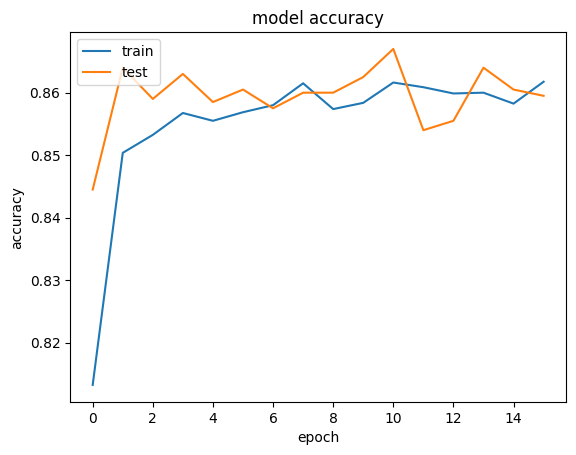

In [30]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

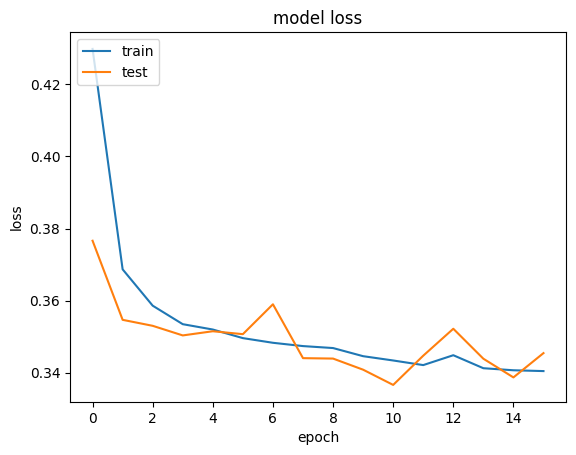

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [33]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1565,   30],
       [ 251,  154]], dtype=int64)

In [34]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [35]:
score

0.8595

In [36]:
##get the weights
classifier.get_weights()

[array([[-3.1401366e-01,  8.6647741e-02, -2.2594863e-01, -4.0944052e-01,
         -1.1952983e-01, -1.4666790e-02, -2.1141507e-01, -2.5536138e-01,
          2.4759705e-01,  7.2060049e-01],
        [-4.3267325e-01, -2.4156439e+00,  9.8504347e-01, -2.2565820e+00,
         -2.2088356e+00, -2.6465626e+00,  1.7291423e+00, -1.3924205e-01,
         -2.3709772e+00, -2.7575290e-01],
        [-5.4158974e-01,  3.0251279e-01, -2.3544393e-02,  5.7156503e-01,
         -4.9627393e-02, -4.6537182e-01, -1.1007661e-01, -6.9034600e-01,
         -2.0032134e-02,  1.7077152e-01],
        [ 1.1803100e+00, -1.3417520e-02,  2.4274719e-01,  1.0000796e+00,
         -9.3111020e-01,  4.6011311e-01, -4.3971959e-01, -1.1144040e+00,
          2.3374487e-01, -2.5401809e+00],
        [ 2.2512550e+00, -9.1589727e-02,  2.5328193e+00, -1.2177062e+00,
          2.5945482e-01, -4.7413528e-01, -4.7290528e-01, -3.4751282e+00,
         -1.6804226e-01,  3.6227897e-02],
        [ 8.9850970e-02, -3.4823710e-01, -8.4449388e-02,  4.

In [37]:
## Saving h5 file
classifier.save('model.h5')

In [38]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [39]:
classifier1.predict(X_test)

array([[0.16071606],
       [0.3574586 ],
       [0.09634382],
       ...,
       [0.06171203],
       [0.11801273],
       [0.19148996]], dtype=float32)

In [40]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
## Regression
## Divide the dataset into independent and dependent features

X=dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y=dataset.iloc[:,12]

In [43]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [44]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [45]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1) 
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))

In [46]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [47]:
import tensorflow
mse=tensorflow.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [48]:
regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

In [49]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=20
   
)

In [50]:
model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 4037850624.0000 - mae: 53209.0117 - val_loss: 3373266944.0000 - val_mae: 49832.6250
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 3356283648.0000 - mae: 49840.7969 - val_loss: 3346824960.0000 - val_mae: 49779.8047
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 3336314624.0000 - mae: 49785.0156 - val_loss: 3350650368.0000 - val_mae: 49750.9453
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 3334617344.0000 - mae: 49728.1680 - val_loss: 3323028224.0000 - val_mae: 49564.8555
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 3327270400.0000 - mae: 49702.8008 - val_loss: 3344398336.0000 - val_mae: 49721.8594
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 3324098560.0000 - mae: 49653.4961 - val_loss: 3378411520.0000 - val_mae: 49961.1406
Epoch 7/100
800/800 [=========================

In [51]:
y_pred=regressor.predict(X_test)

In [52]:
y_pred

array([[105843.67 ],
       [ 99677.89 ],
       [ 99958.49 ],
       ...,
       [ 98091.96 ],
       [ 96865.96 ],
       [ 99225.914]], dtype=float32)